In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.link_prediction import jaccard_coefficient, resource_allocation_index
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df_2023 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2023.csv')
df_2023.head()

/var/folders/qz/n2_fh26j4sq9p69l7t8bkvnw0000gn/T/ipykernel_22113/3759792646.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2023.csv')


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Pennsylvania,23,6,626,2,2023,3,8,1,G
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,Massachusetts,13,6,622,1,2023,4,10,1,L
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,California,91,6,622,1,2023,4,10,1,L
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2023,1,1,1,F
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2023,2,5,1,F


In [3]:
df_2024 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2024.csv')
df_2024.head()

/var/folders/qz/n2_fh26j4sq9p69l7t8bkvnw0000gn/T/ipykernel_22113/565770301.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('../T100D_SEGMENT_US_CARRIER_2024.csv')


,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,DEST_STATE_NM,DEST_WAC,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,Illinois,41,6,622,1,2024,4,10,1,L
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2024,1,1,1,F
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2024,3,7,1,F
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2024,3,8,1,F
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,Rhode Island,15,0,79,1,2024,4,12,1,F


In [4]:
df_2023.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER',
       'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

In [5]:
df_2023.dtypes

DEPARTURES_SCHEDULED     float64
DEPARTURES_PERFORMED     float64
PAYLOAD                  float64
SEATS                    float64
PASSENGERS               float64
FREIGHT                  float64
MAIL                     float64
DISTANCE                 float64
RAMP_TO_RAMP             float64
AIR_TIME                 float64
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
UNIQUE_CARRIER_NAME       object
UNIQUE_CARRIER_ENTITY     object
REGION                    object
CARRIER                   object
CARRIER_NAME              object
CARRIER_GROUP              int64
CARRIER_GROUP_NEW          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
ORIGIN_WAC                 int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_

    Airport  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
44      ORD           0.353289                0.008868                0.125656
83      DEN           0.346637                0.007039                0.117778
48      LAS           0.342203                0.010484                0.116284
33      HPN           0.340724                0.055119                0.093708
569     DFW           0.328899                0.004990                0.122758
243     ANC           0.327421                0.249469                0.045304
46      MSP           0.321508                0.004115                0.117343
30      ATL           0.319290                0.048268                0.123908
301     TEB           0.318551                0.040383                0.081064
77      BNA           0.316334                0.017816                0.119991


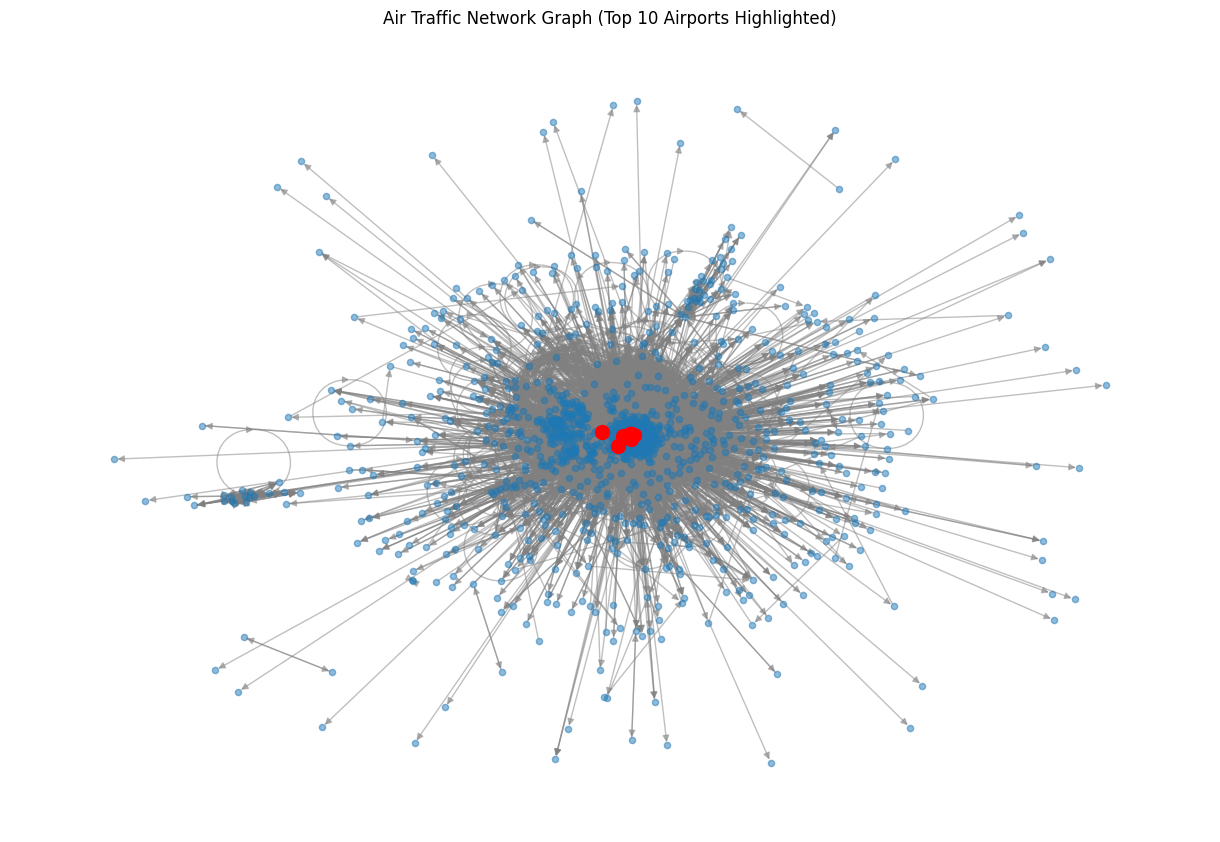

In [6]:
# Create a directed graph
G_2023 = nx.DiGraph()

# Add edges representing flights
for _, row in df_2023.iterrows():
    origin = row["ORIGIN"]
    dest = row["DEST"]
    weight = row["DEPARTURES_PERFORMED"]  # Use number of performed departures as edge weight
    
    if G_2023.has_edge(origin, dest):
        G_2023[origin][dest]["weight"] += weight
    else:
        G_2023.add_edge(origin, dest, weight=weight)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G_2023)
betweenness_centrality = nx.betweenness_centrality(G_2023, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_2023, max_iter=1000)

# Convert centrality measures to DataFrame
centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort by importance
centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
print(centrality_df.head(10))  # Display top 10 busiest airports

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2023, pos, nodelist=centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 Airports Highlighted)")
plt.show()

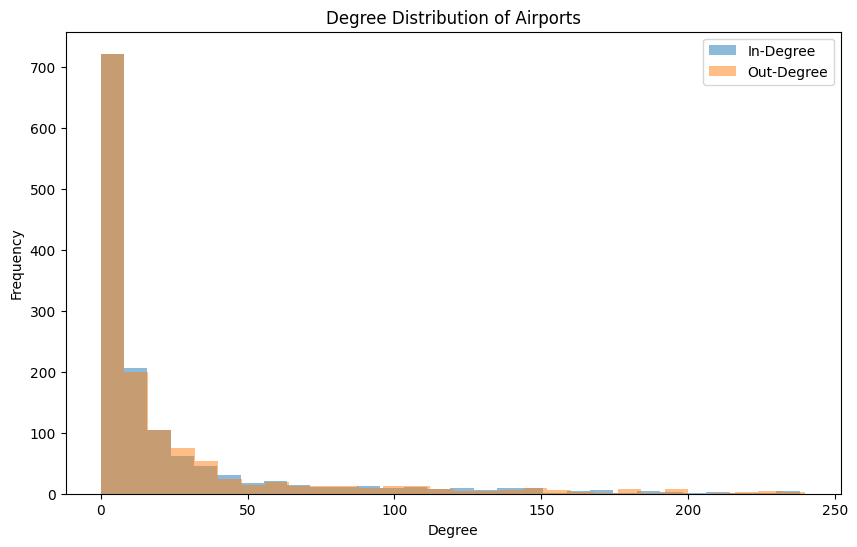

In [7]:
# Degree Distribution
in_degrees = [G_2023.in_degree(n) for n in G_2023.nodes()]
out_degrees = [G_2023.out_degree(n) for n in G_2023.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=30, alpha=0.5, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.5, label='Out-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Airports")
plt.legend()
plt.show()

     ORIGIN  DEPARTURES_PERFORMED
110     ATL              340777.0
295     DEN              307829.0
900     ORD              303032.0
297     DFW              297107.0
247     CLT              229492.0
651     LAX              206864.0
649     LAS              202590.0
944     PHX              194252.0
1071    SEA              188092.0
727     MCO              173227.0


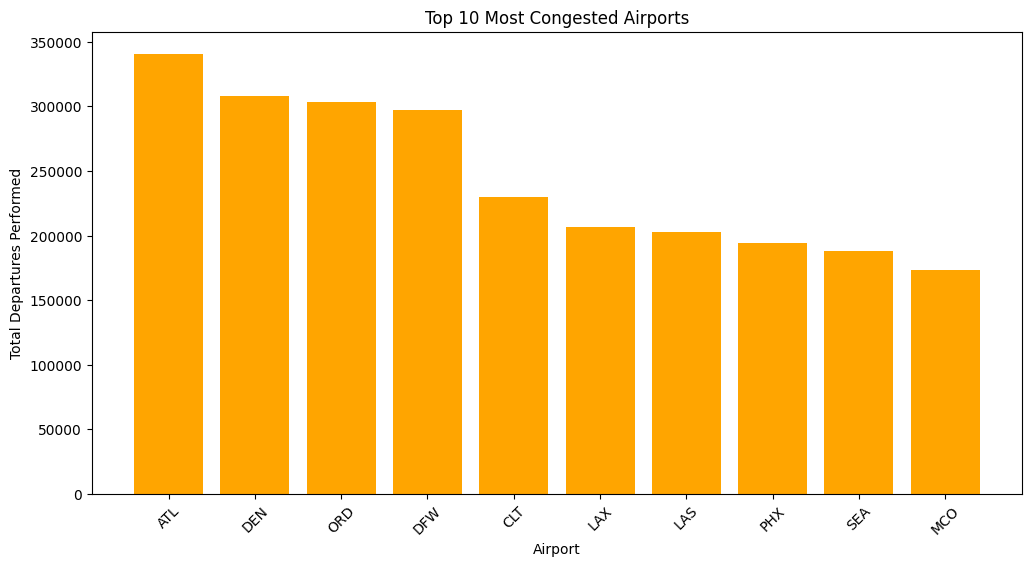

In [8]:
# Air Traffic Congestion Analysis
congestion_df = df_2023.groupby("ORIGIN")["DEPARTURES_PERFORMED"].sum().reset_index()
congestion_df = congestion_df.sort_values(by="DEPARTURES_PERFORMED", ascending=False)
print(congestion_df.head(10))  # Display top 10 most congested airports

# Plot congestion
plt.figure(figsize=(12, 6))
plt.bar(congestion_df["ORIGIN"].head(10), congestion_df["DEPARTURES_PERFORMED"].head(10), color='orange')
plt.xlabel("Airport")
plt.ylabel("Total Departures Performed")
plt.title("Top 10 Most Congested Airports")
plt.xticks(rotation=45)
plt.show()

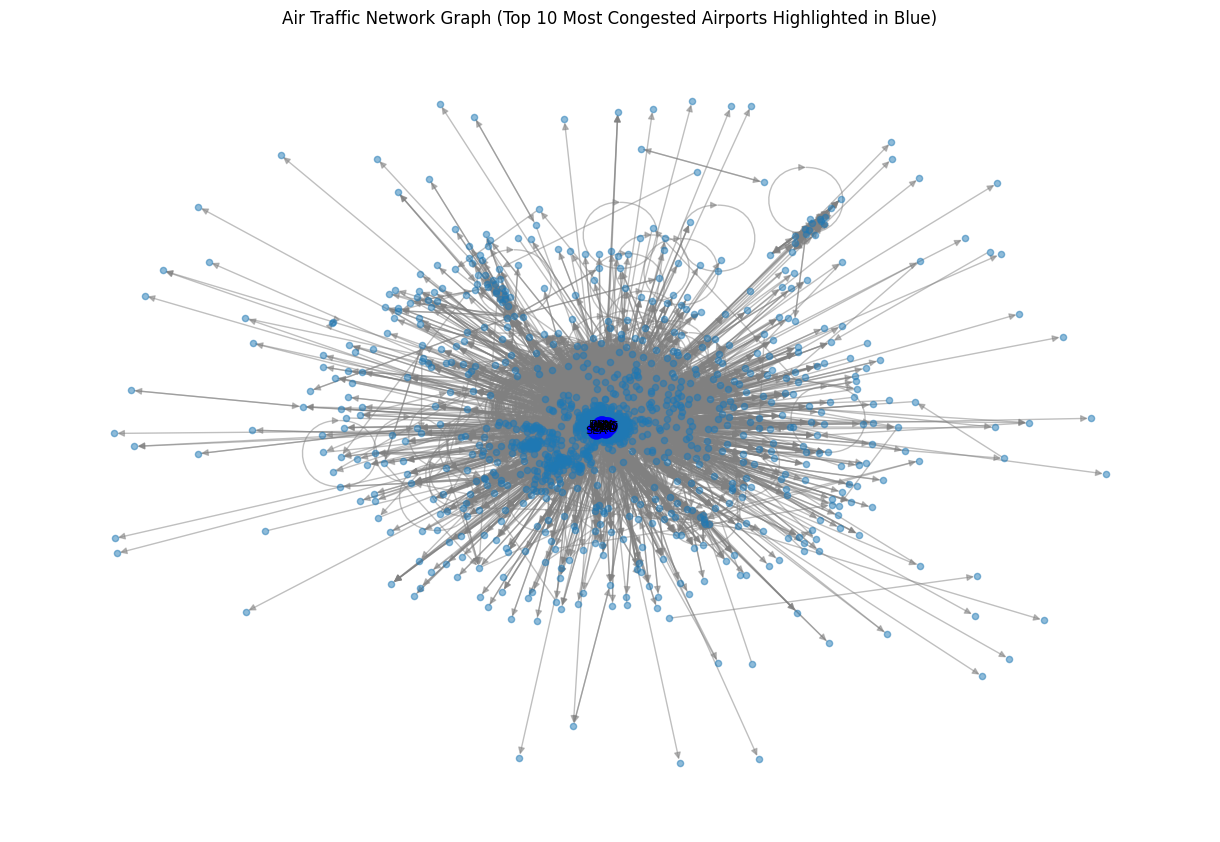

In [9]:
# Visualize Congestion in NetworkX
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2023, pos, nodelist=congestion_df["ORIGIN"].head(10).tolist(), node_color='blue', node_size=150)
nx.draw_networkx_labels(G_2023, pos, labels={airport: airport for airport in congestion_df["ORIGIN"].head(10)}, font_size=8)
plt.title("Air Traffic Network Graph (Top 10 Most Congested Airports Highlighted in Blue)")
plt.show()

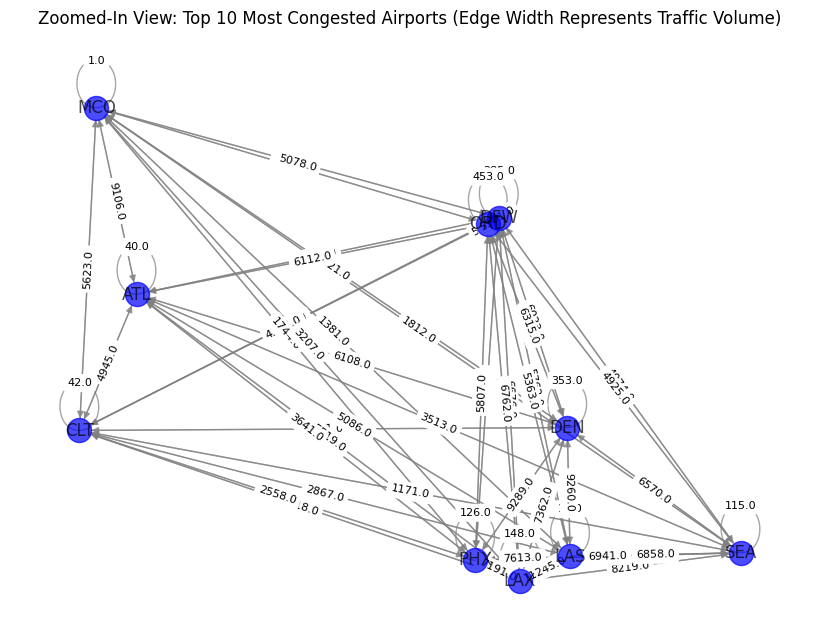

In [10]:
# Zoomed-in visualization for most congested airports
subgraph_nodes = congestion_df["ORIGIN"].head(10).tolist()
subG = G_2023.subgraph(subgraph_nodes)
plt.figure(figsize=(8, 6))
pos_sub = nx.spring_layout(subG, k=0.2)
nx.draw(subG, pos_sub, node_size=300, node_color='blue', edge_color='gray', alpha=0.7, with_labels=True)
edge_labels_sub = {(u, v): f'{subG[u][v]["weight"]}' for u, v in subG.edges()}
nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=edge_labels_sub, font_size=8)
plt.title("Zoomed-In View: Top 10 Most Congested Airports (Edge Width Represents Traffic Volume)")
plt.show()

    Airport  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
0       ORD           0.362694                0.010473                0.125554
40      DEN           0.344189                0.021774                0.118600
38      MSP           0.339008                0.012565                0.120491
637     DFW           0.329386                0.010042                0.123611
27      LAS           0.319763                0.009320                0.115234
25      ATL           0.316062                0.005336                0.122428
87      ANC           0.314582                0.213998                0.045676
9       HPN           0.310141                0.041476                0.085108
215     TEB           0.306440                0.049282                0.072602
21      BNA           0.301999                0.011633                0.121876


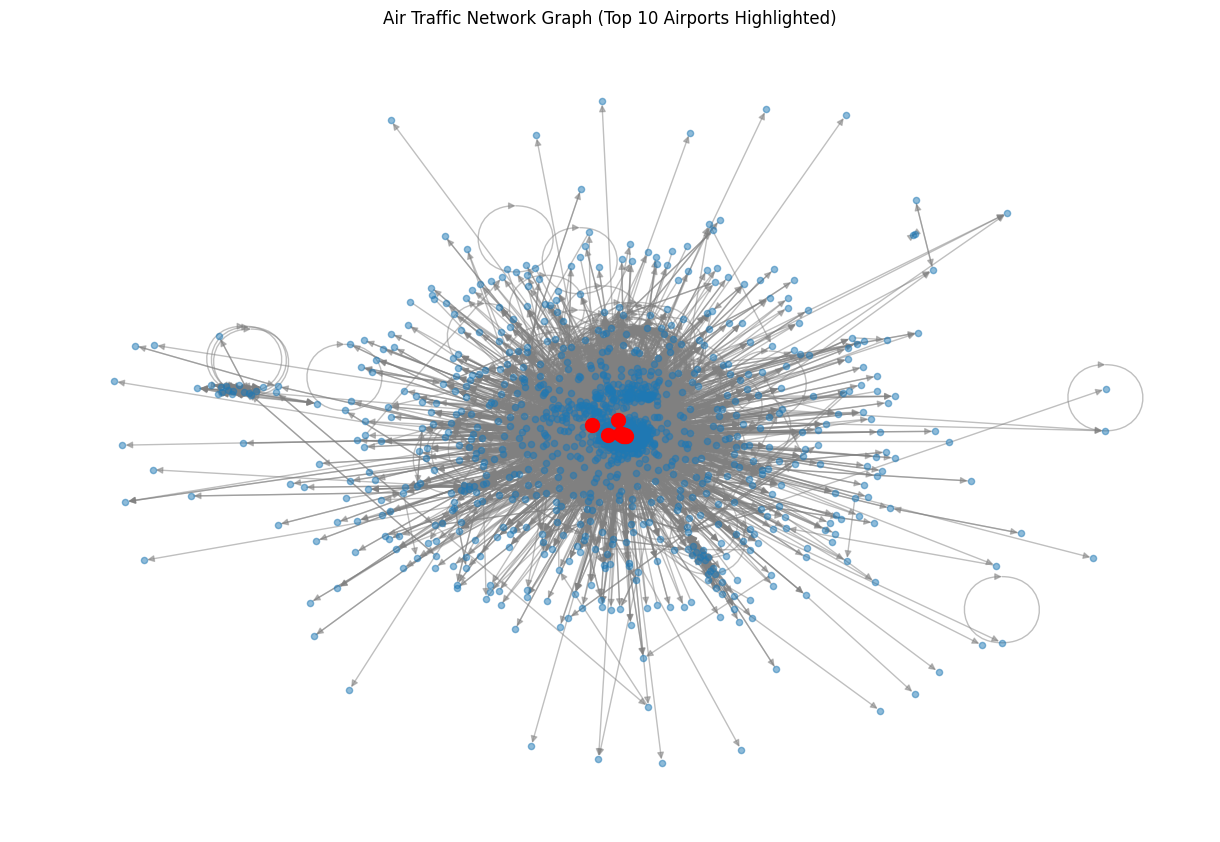

In [12]:
# Create a directed graph
G_2024 = nx.DiGraph()

# Add edges representing flights
for _, row in df_2024.iterrows():
    origin = row["ORIGIN"]
    dest = row["DEST"]
    weight = row["DEPARTURES_PERFORMED"]  # Use number of performed departures as edge weight
    
    if G_2024.has_edge(origin, dest):
        G_2024[origin][dest]["weight"] += weight
    else:
        G_2024.add_edge(origin, dest, weight=weight)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G_2024)
betweenness_centrality = nx.betweenness_centrality(G_2024, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G_2024, max_iter=1000)

# Convert centrality measures to DataFrame
centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort by importance
centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)
print(centrality_df.head(10))  # Display top 10 busiest airports

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2024, k=0.15)
nx.draw(G_2024, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2024, pos, nodelist=centrality_df["Airport"].head(10), node_color='red', node_size=100)
plt.title("Air Traffic Network Graph (Top 10 Airports Highlighted)")
plt.show()

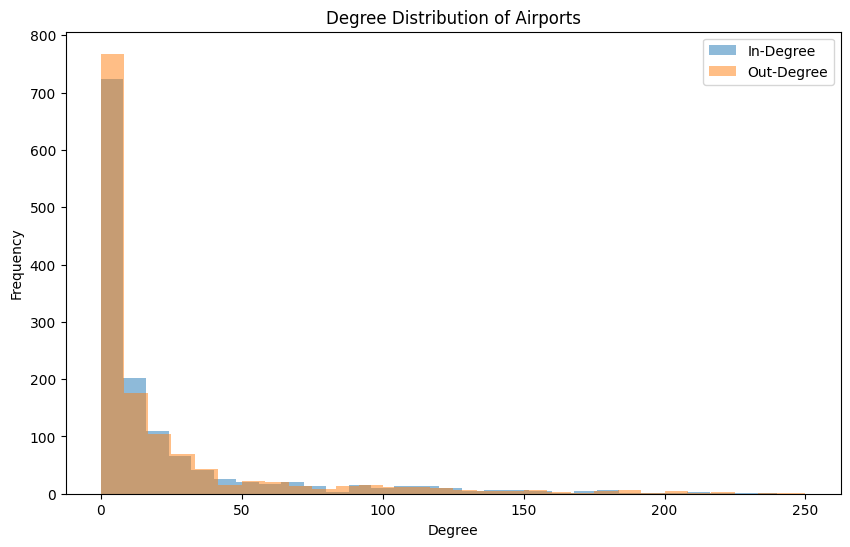

In [13]:
# Degree Distribution
in_degrees = [G_2024.in_degree(n) for n in G_2024.nodes()]
out_degrees = [G_2024.out_degree(n) for n in G_2024.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(in_degrees, bins=30, alpha=0.5, label='In-Degree')
plt.hist(out_degrees, bins=30, alpha=0.5, label='Out-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Airports")
plt.legend()
plt.show()

     ORIGIN  DEPARTURES_PERFORMED
114     ATL              345209.0
896     ORD              328086.0
300     DEN              321994.0
302     DFW              320463.0
248     CLT              255929.0
943     PHX              208622.0
648     LAX              206637.0
646     LAS              202584.0
1075    SEA              191107.0
527     IAH              170715.0


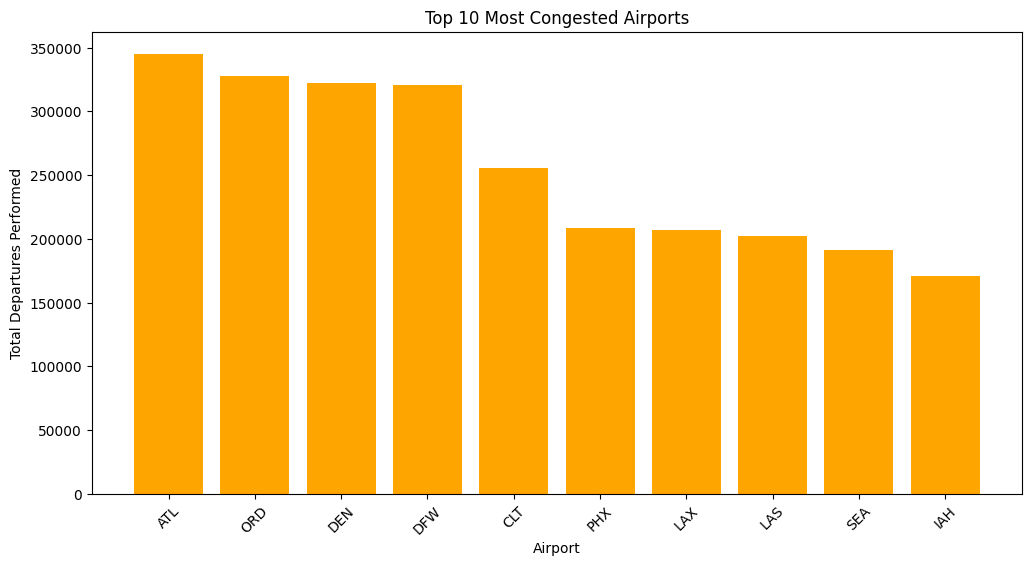

In [14]:
# Air Traffic Congestion Analysis
congestion_df = df_2024.groupby("ORIGIN")["DEPARTURES_PERFORMED"].sum().reset_index()
congestion_df = congestion_df.sort_values(by="DEPARTURES_PERFORMED", ascending=False)
print(congestion_df.head(10))  # Display top 10 most congested airports

# Plot congestion
plt.figure(figsize=(12, 6))
plt.bar(congestion_df["ORIGIN"].head(10), congestion_df["DEPARTURES_PERFORMED"].head(10), color='orange')
plt.xlabel("Airport")
plt.ylabel("Total Departures Performed")
plt.title("Top 10 Most Congested Airports")
plt.xticks(rotation=45)
plt.show()

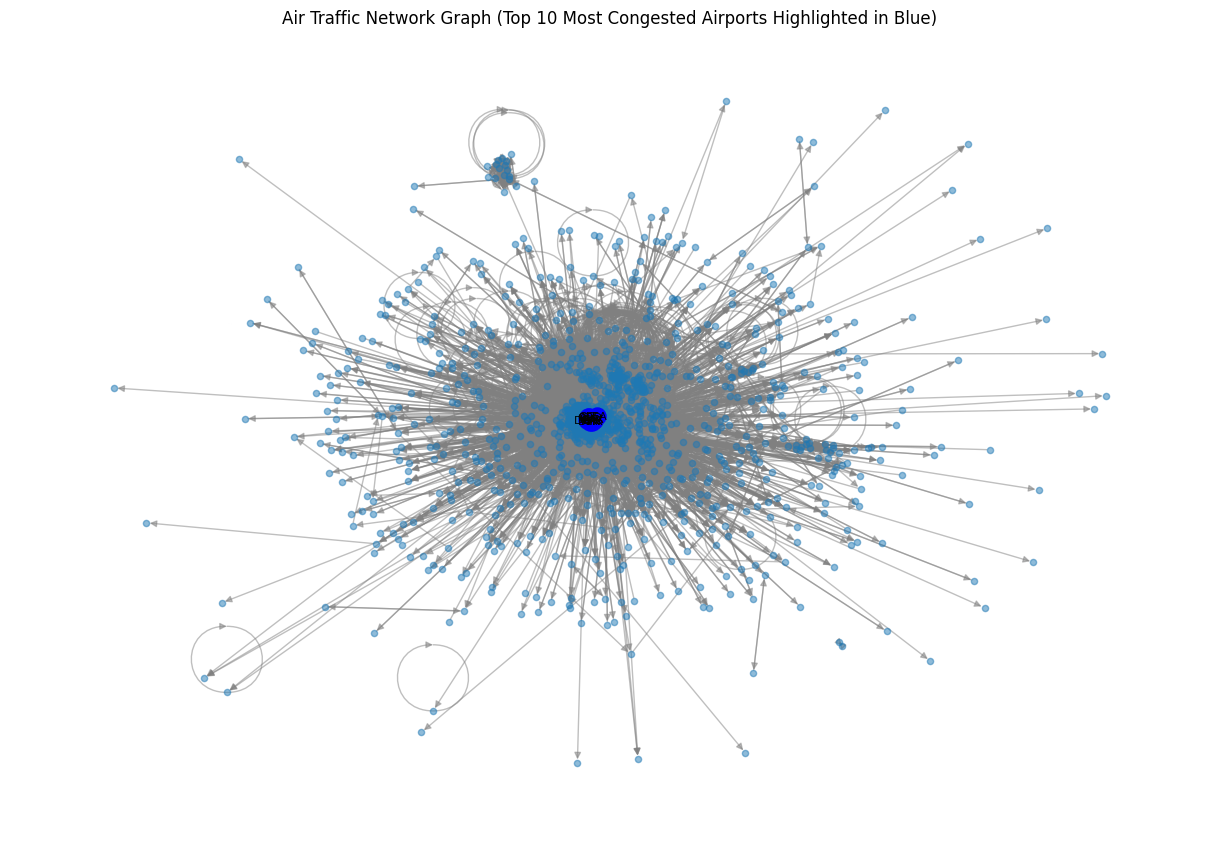

In [15]:
# Visualize Congestion in NetworkX
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_2024, k=0.15)
nx.draw(G_2024, pos, node_size=20, edge_color='gray', alpha=0.5)
nx.draw_networkx_nodes(G_2024, pos, nodelist=congestion_df["ORIGIN"].head(10).tolist(), node_color='blue', node_size=150)
nx.draw_networkx_labels(G_2024, pos, labels={airport: airport for airport in congestion_df["ORIGIN"].head(10)}, font_size=8)
plt.title("Air Traffic Network Graph (Top 10 Most Congested Airports Highlighted in Blue)")
plt.show()

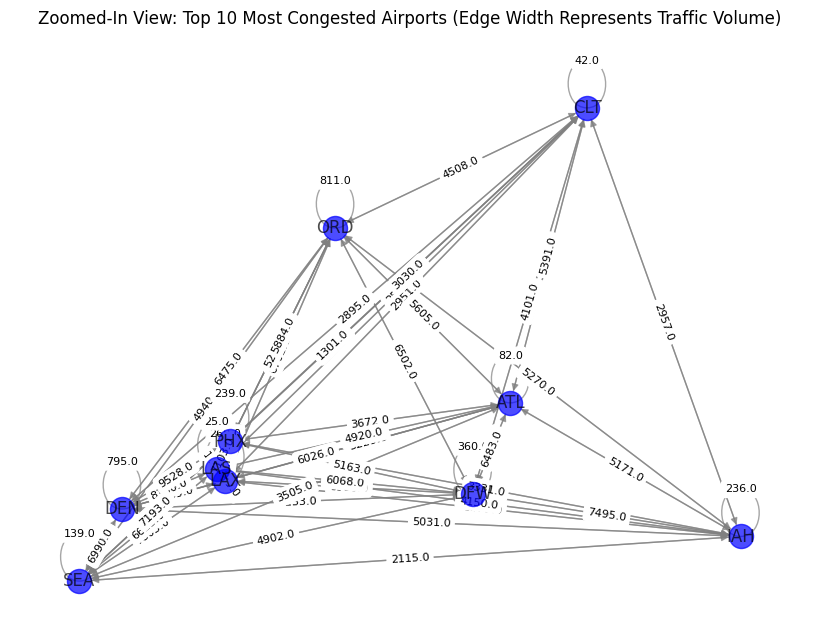

In [16]:
# Zoomed-in visualization for most congested airports
subgraph_nodes = congestion_df["ORIGIN"].head(10).tolist()
subG = G_2024.subgraph(subgraph_nodes)
plt.figure(figsize=(8, 6))
pos_sub = nx.spring_layout(subG, k=0.2)
nx.draw(subG, pos_sub, node_size=300, node_color='blue', edge_color='gray', alpha=0.7, with_labels=True)
edge_labels_sub = {(u, v): f'{subG[u][v]["weight"]}' for u, v in subG.edges()}
nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=edge_labels_sub, font_size=8)
plt.title("Zoomed-In View: Top 10 Most Congested Airports (Edge Width Represents Traffic Volume)")
plt.show()

In [24]:
# Identify new routes introduced in 2024
new_routes = set(G_2024.edges()) - set(G_2023.edges())

# Compute centrality measures for congestion and connectivity
degree_centrality = nx.out_degree_centrality(G_2023)  # Out-degree: More departing flights
betweenness_centrality = nx.betweenness_centrality(G_2023, weight="weight")
katz_centrality = nx.katz_centrality_numpy(G_2023, alpha=0.005, beta=1.0)

# Convert centrality to DataFrame
centrality_df = pd.DataFrame({
    "Airport": list(degree_centrality.keys()),
    "Out-Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Katz Centrality": list(katz_centrality.values())
}).sort_values(by="Out-Degree Centrality", ascending=False)

print("Top Congested Airports in 2023:")
print(centrality_df.head(10))

# ========================
#  LINK PREDICTION MODEL
# ========================

# Generate candidate edges for link prediction (excluding existing edges)
existing_edges = set(G_2023.edges())
possible_new_edges = [
    (u, v) for u in G_2023.nodes() for v in G_2023.nodes() if u != v and (u, v) not in existing_edges
]

# Feature Extraction: Preferential Attachment and Katz Score
features = []
labels = []

for u, v in possible_new_edges:
    pref_attach = G_2023.out_degree(u) * G_2023.in_degree(v)  # Pref. Attachment
    katz_u, katz_v = katz_centrality.get(u, 0), katz_centrality.get(v, 0)
    
    label = 1 if (u, v) in new_routes else 0  # If new route appeared in 2024
    
    features.append([pref_attach, katz_u, katz_v])
    labels.append(label)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Machine Learning Model (Random Forest Classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
print("Link Prediction Model Performance:")
print(classification_report(y_test, y_pred))

# ========================
#  VISUALIZE PREDICTIONS
# ========================

# Predict likelihood of new routes
predicted_edges = []
for (u, v), feature in zip(possible_new_edges, X):
    score = clf.predict_proba([feature])[0][1]  # Probability of new link
    if score > 0.7:  # Threshold for high probability
        predicted_edges.append((u, v, score))

# Plot top predicted new routes
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_2023, k=0.15)
nx.draw(G_2023, pos, node_size=20, edge_color="gray", alpha=0.5)

# Highlight predicted edges
for u, v, score in predicted_edges[:20]:  # Show only top 20 predictions
    nx.draw_networkx_edges(G_2023, pos, edgelist=[(u, v)], edge_color="red", width=2)

plt.title("Predicted New Routes in 2024 (Red = Likely New Route)")
plt.show()

Top Congested Airports in 2023:
    Airport  Out-Degree Centrality  Betweenness Centrality  Katz Centrality
44      ORD               0.177384                0.008868         0.067678
48      LAS               0.176644                0.010484         0.064820
83      DEN               0.174427                0.007039         0.065849
33      HPN               0.168514                0.055119         0.062199
301     TEB               0.166297                0.040383         0.057155
569     DFW               0.165558                0.004990         0.065225
46      MSP               0.165558                0.004115         0.063401
30      ATL               0.161123                0.048268         0.064663
77      BNA               0.160384                0.017816         0.063879
4       LAX               0.159645                0.025731         0.059345
Link Prediction Model Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.0

KeyboardInterrupt: 